## Install Semua Library yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import regex as re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

import optuna

import warnings
warnings.filterwarnings("ignore")
import random

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import plotly.express as px

d:\Aplikasi\Program\python\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

seed=42

<Figure size 640x480 with 0 Axes>

### Read Data

In [3]:
laptop = pd.read_csv('laptop_clean.csv')

laptop

,company,product,category,screen(pixel),ram(GB),gpu,os,os_version,weigth(kg),price,...,screentype,touchscreen,cpu_name,cpu_speed(GHz),cpu_brand,storage_1(GB),storage_2(GB),storage_1_type,storage_2_type,gpu_name
0,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,macOS,1.37,11912523.48,...,IPSPanelRetinaDisplay,0.0,Intel Core i5,2.3,Intel,128.0,0.0,SSD,NaN,Intel
1,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,macOS,1.34,7993374.48,...,NaN,0.0,Intel Core i5,1.8,Intel,128.0,0.0,Flash Storage,NaN,Intel
2,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,No OS,1.86,5112900.00,...,NaN,0.0,Intel Core i5 7200U,2.5,Intel,256.0,0.0,SSD,NaN,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,macOS,1.83,22563005.40,...,IPSPanelRetinaDisplay,0.0,Intel Core i7,2.7,Intel,512.0,0.0,SSD,NaN,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,macOS,1.37,16037611.20,...,IPSPanelRetinaDisplay,0.0,Intel Core i5,3.1,Intel,256.0,0.0,SSD,NaN,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,17.3,32,Nvidia GeForce GTX 1070,Windows,Windows 10,4.42,24897600.00,...,NaN,0.0,Intel Core i7 6700HQ,2.6,Intel,256.0,1000.0,SSD,HDD,Nvidia
973,Toshiba,Tecra A40-C-1DF,Notebook,14.0,8,Intel HD Graphics 520,Windows,Windows 10,1.95,10492560.00,...,NaN,0.0,Intel Core i5 6200U,2.3,Intel,256.0,0.0,SSD,NaN,Intel
974,Asus,Rog Strix,Gaming,17.3,16,Nvidia GeForce GTX 1060,Windows,Windows 10,2.73,18227710.80,...,NaN,0.0,Intel Core i7 7700HQ,2.8,Intel,256.0,1000.0,SSD,HDD,Nvidia
975,HP,Probook 450,Notebook,15.6,8,Nvidia GeForce 930MX,Windows,Windows 10,2.04,8705268.00,...,IPSPanel,0.0,Intel Core i5 7200U,2.7,Intel,128.0,1000.0,SSD,HDD,Nvidia


### Menampilkan Info Dataset

In [4]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         977 non-null    object 
 1   product         977 non-null    object 
 2   category        977 non-null    object 
 3   screen(pixel)   977 non-null    float64
 4   ram(GB)         977 non-null    int64  
 5   gpu             977 non-null    object 
 6   os              977 non-null    object 
 7   os_version      977 non-null    object 
 8   weigth(kg)      977 non-null    float64
 9   price           977 non-null    float64
 10  resolution      977 non-null    object 
 11  screentype      280 non-null    object 
 12  touchscreen     977 non-null    float64
 13  cpu_name        977 non-null    object 
 14  cpu_speed(GHz)  977 non-null    float64
 15  cpu_brand       977 non-null    object 
 16  storage_1(GB)   977 non-null    float64
 17  storage_2(GB)   977 non-null    flo

#### Kolom Company/Perusahaan

In [5]:
print(laptop.company)
print("")
print(laptop.company.unique())
print("")
print(laptop.company.value_counts())

0        Apple
1        Apple
2           HP
3        Apple
4        Apple
        ...   
972       Dell
973    Toshiba
974       Asus
975         HP
976     Lenovo
Name: company, Length: 977, dtype: object

['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']

Dell         232
Lenovo       226
HP           179
Asus         122
Acer          83
Toshiba       39
MSI           34
Apple         17
Samsung        8
Mediacom       7
Microsoft      6
Razer          5
Xiaomi         4
Chuwi          3
Google         3
LG             3
Huawei         2
Vero           2
Fujitsu        2
Name: company, dtype: int64


##### Distribusi Laptop Berdasarkan Company/Perusahaan

**Menggunakan Matplotlib**

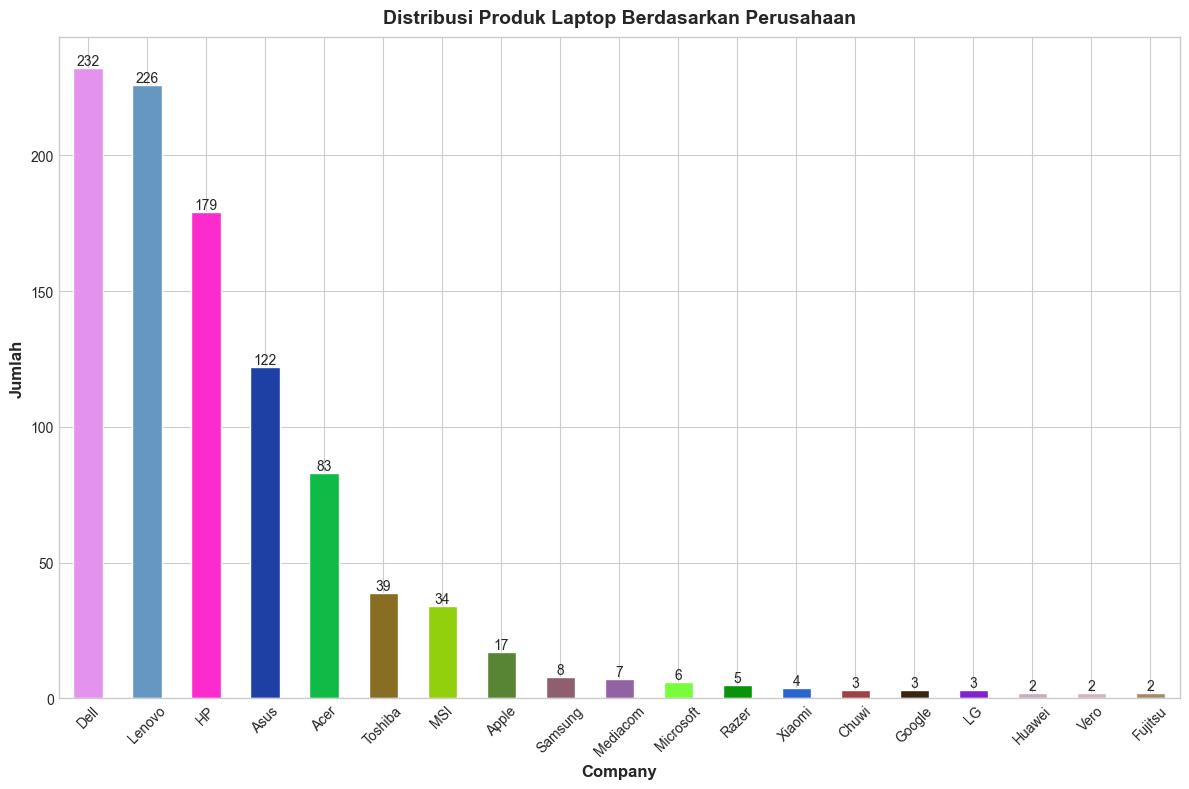

In [6]:
jumlah_company = laptop['company'].value_counts()

colors = ['#'+''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(len(jumlah_company))]

plt.figure(figsize=(12, 8))
ax = jumlah_company.plot(kind='bar', color = colors)
plt.title("Distribusi Produk Laptop Berdasarkan Perusahaan")
plt.xlabel('Company')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

**Menggunakan Ploly**

In [7]:
grouped_company = laptop.groupby('company').size().reset_index(name='counts')
grouped_company = grouped_company.sort_values(by='counts', ascending=False)

fig = px.bar(grouped_company, x='company', y='counts', color='company', labels={'counts':'Jumlah Laptop'}, title="Jumlah Laptop berdasarkan Perusahaan")
fig.show()

##### Distribusi Laptop Berdasarkan Category Laptop

In [8]:
category = laptop.category
print(f"{category}\n\n{category.unique()}\n\n{category.value_counts()}")

0      Ultrabook
1      Ultrabook
2       Notebook
3      Ultrabook
4      Ultrabook
         ...    
972       Gaming
973     Notebook
974       Gaming
975     Notebook
976     Notebook
Name: category, Length: 977, dtype: object

['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']

Notebook              549
Ultrabook             152
Gaming                150
2 in 1 Convertible     85
Workstation            24
Netbook                17
Name: category, dtype: int64


**Menggunakan Matplotlib**

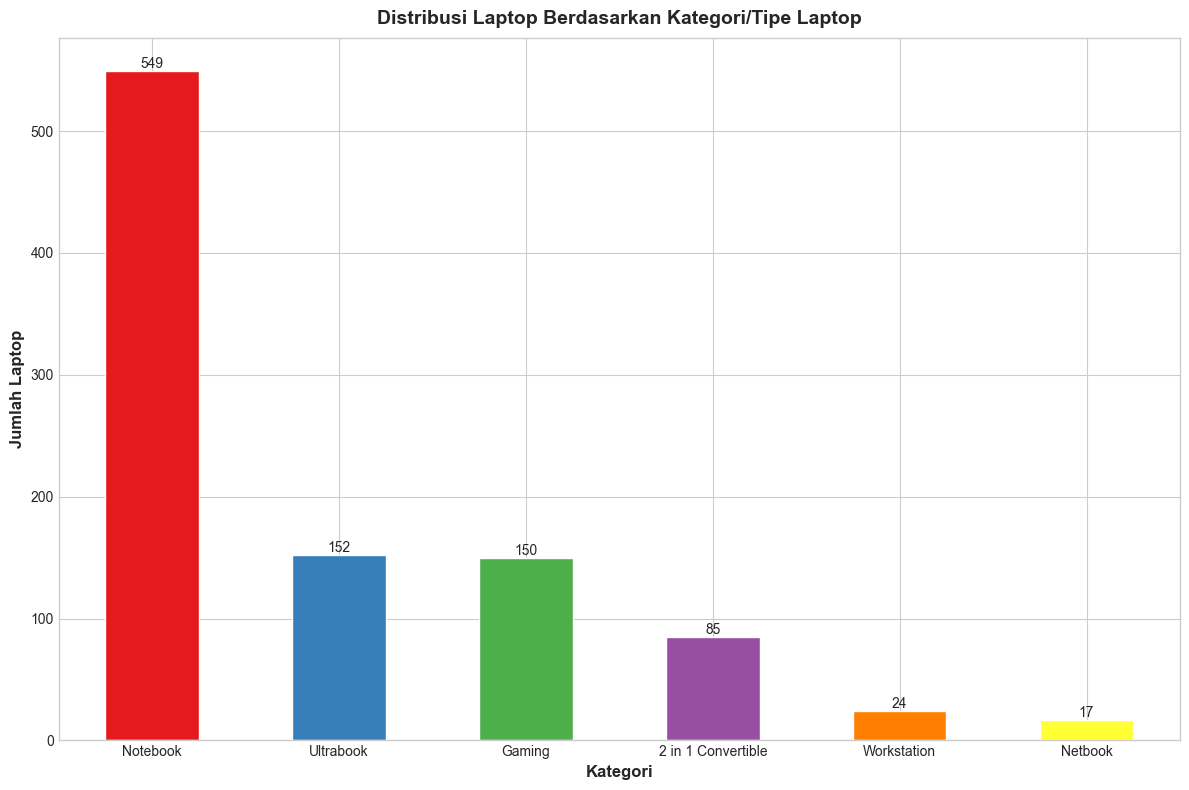

In [9]:
jumlah_kategori = laptop['category'].value_counts()

colors = sns.color_palette('Set1', len(jumlah_kategori))

plt.figure(figsize=(12, 8))
ax = jumlah_kategori.plot(kind='bar', color=colors)
plt.title('Distribusi Laptop Berdasarkan Kategori/Tipe Laptop')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Laptop')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

**Menggunakan Plotly**

In [10]:
grouped_kategori = laptop.groupby('category').size().reset_index(name='counts')
grouped_kategori = grouped_kategori.sort_values(by='counts', ascending=False)

fig = px.bar(grouped_kategori, x = 'category', y = 'counts', color = 'category', labels={'counts': 'Jumlah Laptop'}, title="Jumlah Laptop Berdasarkan Kategori/Tipe Laptop")
fig.show()

##### Distribusi Laptop Berdasarkan Besar RAM (GB)

In [11]:
ram = laptop['ram(GB)']
print(f"{ram}\n\n{ram.unique()}\n\n{ram.value_counts()}")

0       8
1       8
2       8
3      16
4       8
       ..
972    32
973     8
974    16
975     8
976     4
Name: ram(GB), Length: 977, dtype: int64

[ 8 16  4  2 12  6 32 24]

8     483
4     271
16    149
6      24
12     21
32     16
2      10
24      3
Name: ram(GB), dtype: int64


**Menggunakan Matplotlib**

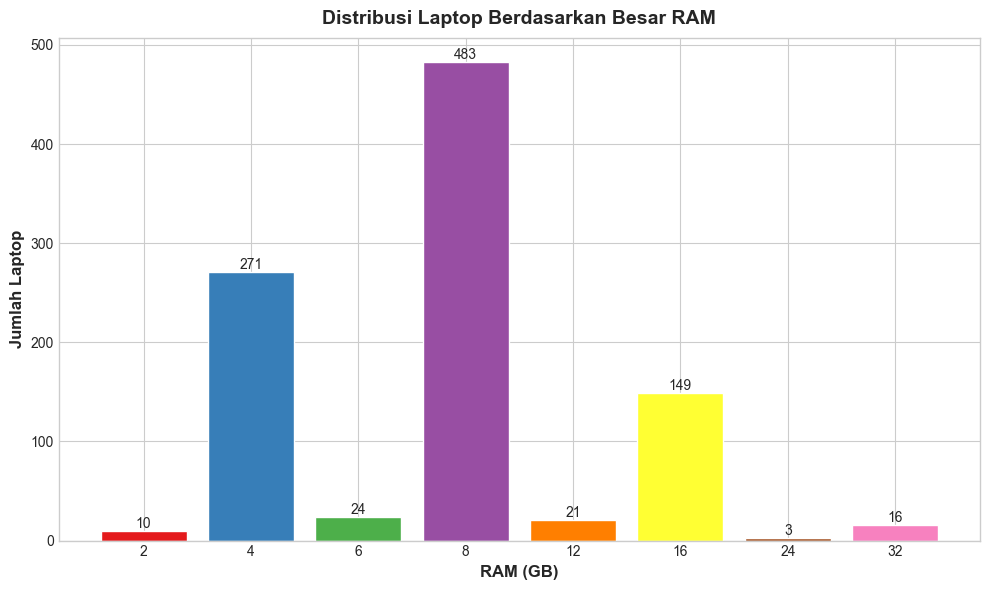

In [12]:
besar_ram = laptop['ram(GB)'].value_counts()
besar_ram = besar_ram.sort_index()

colors = sns.color_palette('Set1', len(besar_ram))

plt.figure(figsize=(10, 6))
plt.bar(range(len(besar_ram)), besar_ram.values, color=colors)
plt.title("Distribusi Laptop Berdasarkan Besar RAM")
plt.xlabel('RAM (GB)')
plt.ylabel('Jumlah Laptop')
plt.xticks(range(len(besar_ram)), besar_ram.index)
for i, v in enumerate(besar_ram.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.show()


**Menggunakan Plotly**

In [13]:
grouped_ram = laptop.groupby('ram(GB)').size().reset_index(name='counts')
grouped_ram['ram(GB)'] = grouped_ram['ram(GB)'].astype(str)

fig = px.bar(grouped_ram, x = 'ram(GB)', y = 'counts', color='ram(GB)', labels={'counts': "Jumlah Laptop"}, title="Jumlah Laptop Berdasarkan Besar RAM(GB) yang digunakan")

fig.show()

In [14]:
fig = px.histogram(laptop, x = 'ram(GB)', title="RAM Distribution", marginal = 'violin')
fig.show()

##### Kolom Screen/Ukuran Layar(Inch)

In [15]:
screen = laptop['screen(pixel)']
print(f"{screen}\n\n{screen.unique()}\n\n{screen.value_counts()}")

0      13.3
1      13.3
2      15.6
3      15.4
4      13.3
       ... 
972    17.3
973    14.0
974    17.3
975    15.6
976    14.0
Name: screen(pixel), Length: 977, dtype: float64

[13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]

15.6    494
14.0    146
17.3    131
13.3    123
11.6     27
12.5     23
13.5      6
13.9      6
15.4      4
12.3      4
12.0      3
15.0      3
13.0      2
10.1      1
18.4      1
17.0      1
14.1      1
11.3      1
Name: screen(pixel), dtype: int64


**Menggunakan Matplotlib**

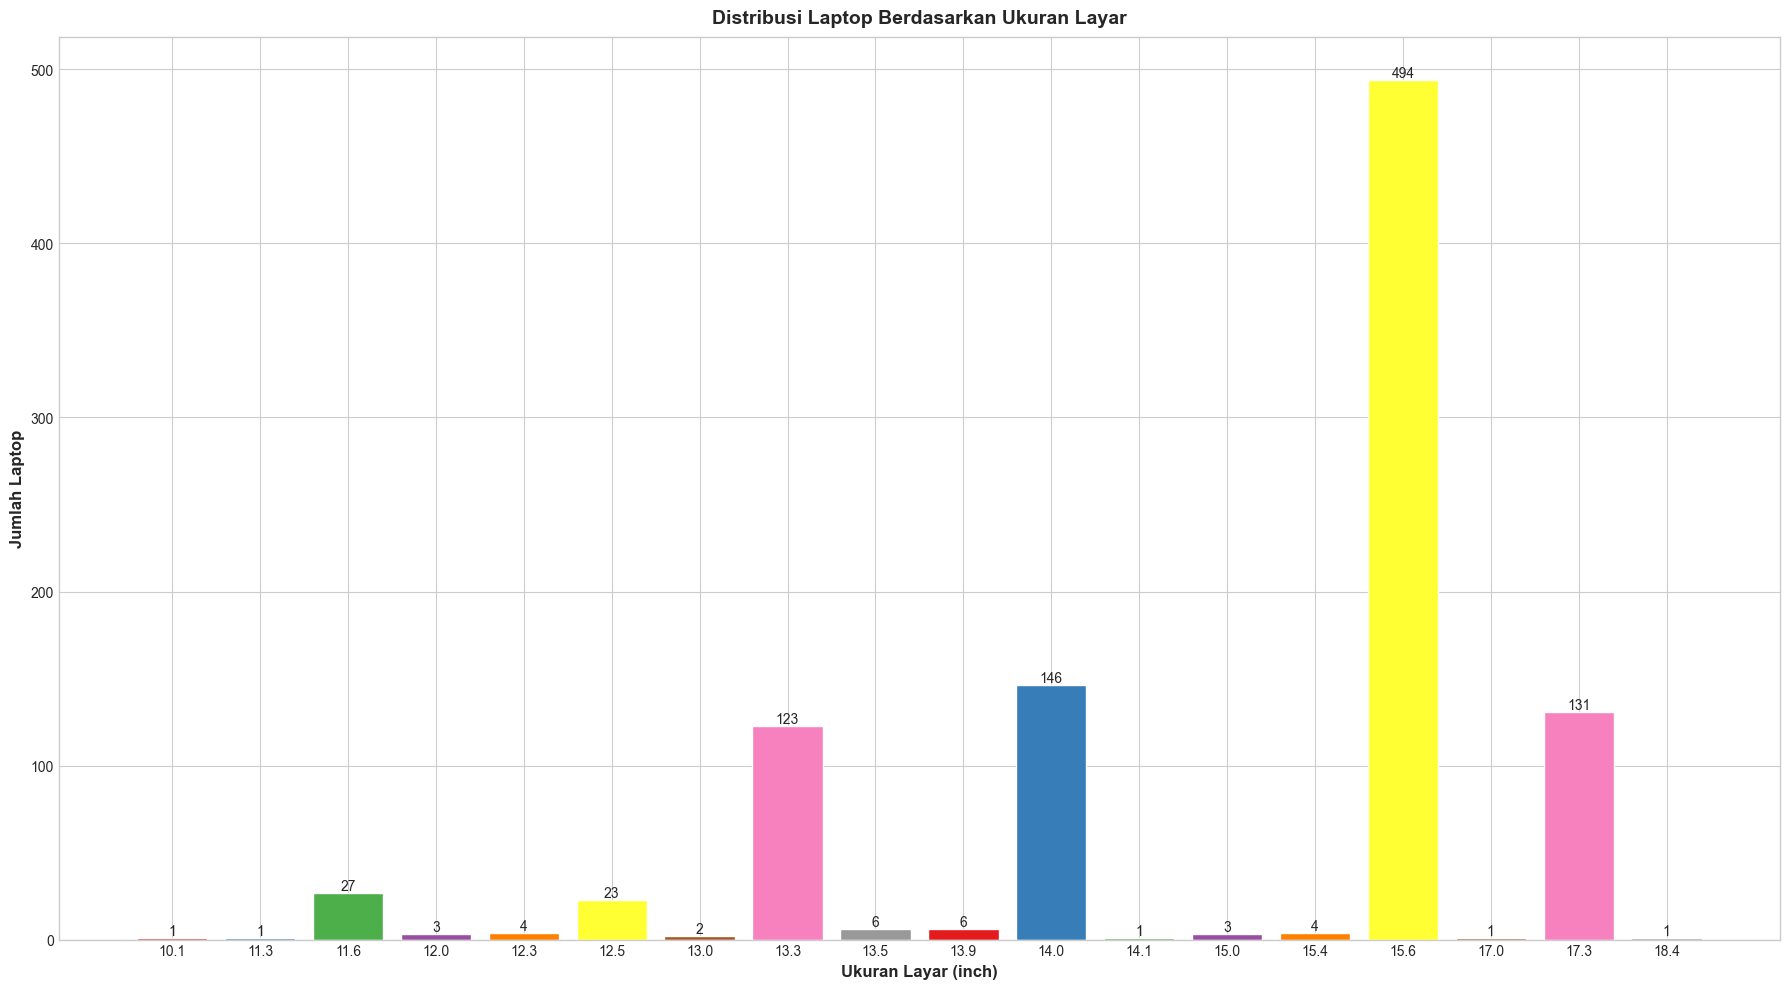

In [16]:
jumlah_screen = laptop['screen(pixel)'].astype(str).value_counts()
jumlah_screen = jumlah_screen.sort_index()

colors = sns.color_palette('Set1', len(jumlah_screen))

plt.figure(figsize=(18, 10))
plt.bar(jumlah_screen.index, jumlah_screen.values, color = colors)
plt.title("Distribusi Laptop Berdasarkan Ukuran Layar")
plt.xlabel('Ukuran Layar (inch)')
plt.ylabel('Jumlah Laptop')
for i, v in enumerate(jumlah_screen.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

**Menggunakan Plotly**

In [17]:
grouped_screen = laptop.groupby('screen(pixel)').size().reset_index(name='counts')
grouped_screen['screen(pixel)'] = grouped_screen['screen(pixel)'].astype(str)

fig = px.bar(grouped_screen, x = 'screen(pixel)', y = 'counts', color = 'screen(pixel)', labels={'counts': 'Jumlah Laptop'}, title="Jumlah Laptop Berdasarkan Ukuran Layara digunakan")

fig.show()

##### Kolom GPU

In [18]:
gpu_list = laptop['gpu'].value_counts()[:10].index.tolist()

data = laptop.copy()
data = data[data['gpu'].isin(gpu_list)]

grouped_gpu = data.groupby('gpu').size().reset_index(name='counts')

grouped_gpu = grouped_gpu.sort_values(by='counts', ascending=False)

fig = px.bar(grouped_gpu, x='gpu', y='counts', color='gpu', labels={'counts':'Jumlah Laptop'}, title="TOP 10 Common GPUs")
fig.show()

*GPU Name*

**Menggunakan Matplotlib**

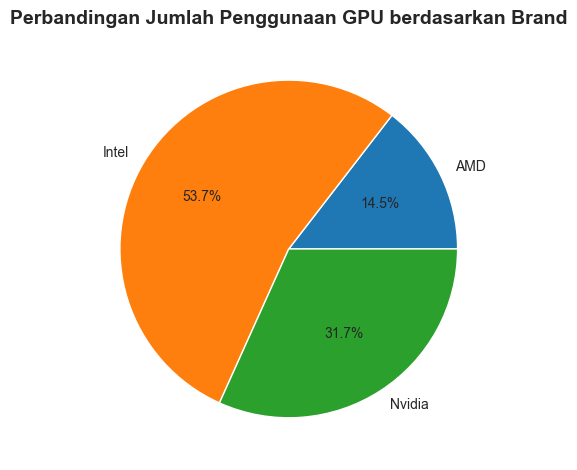

In [19]:
import matplotlib.pyplot as plt

gpu_name = laptop.groupby(['gpu_name']).size().reset_index(name='counts')

plt.pie(gpu_name['counts'], labels=gpu_name['gpu_name'], autopct='%1.1f%%')
plt.title('Perbandingan Jumlah Penggunaan GPU berdasarkan Brand')
plt.show()

In [20]:
fig = px.pie(gpu_name, names = 'gpu_name', values = 'counts', labels = {'counts': 'Jumlah Laptop'}, title = 'Perbandingan Jumlah Penggunaan GPU berdasarkan Brand')

fig.show()

##### Kolom Sistem Operasi

**Menggunakan Matplotlib**

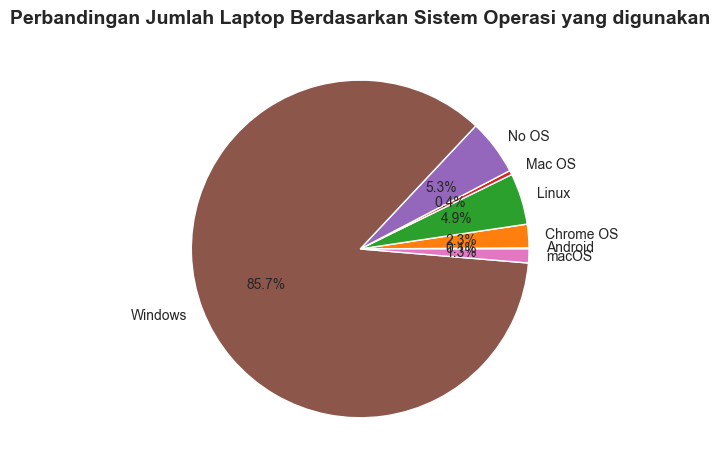

In [21]:
grouped_os = laptop.groupby('os').size().reset_index(name = 'counts')

plt.pie(grouped_os['counts'], labels=grouped_os['os'], autopct='%1.1f%%')
plt.title('Perbandingan Jumlah Laptop Berdasarkan Sistem Operasi yang digunakan')
plt.show()

**Menggunakan Plotly**

In [22]:
fig = px.pie(grouped_os, values = 'counts', names = 'os', labels={'counts': 'Jumlah Laptop'}, title='Jumlah Laptop Berdasarkan Sistem Operasinya')
fig.show()

##### Kolom Versi Sistem Operasi

In [23]:
grouped_os_version = laptop.groupby(['os_version', 'os']).size().reset_index(name= 'counts')

fig = px.bar(grouped_os_version, x = 'os', y = 'counts', color = 'os_version', labels = {'counts': 'Jumlah Laptop'}, title= 'Jumlah Laptop Berdasarkan Versi Sistem Operasinya')
fig.update_layout(width = 2400, height = 1000)
fig.show()

##### Kolom Berat (Kg)

**Menggunakan Seaborn dan Matplotlib**

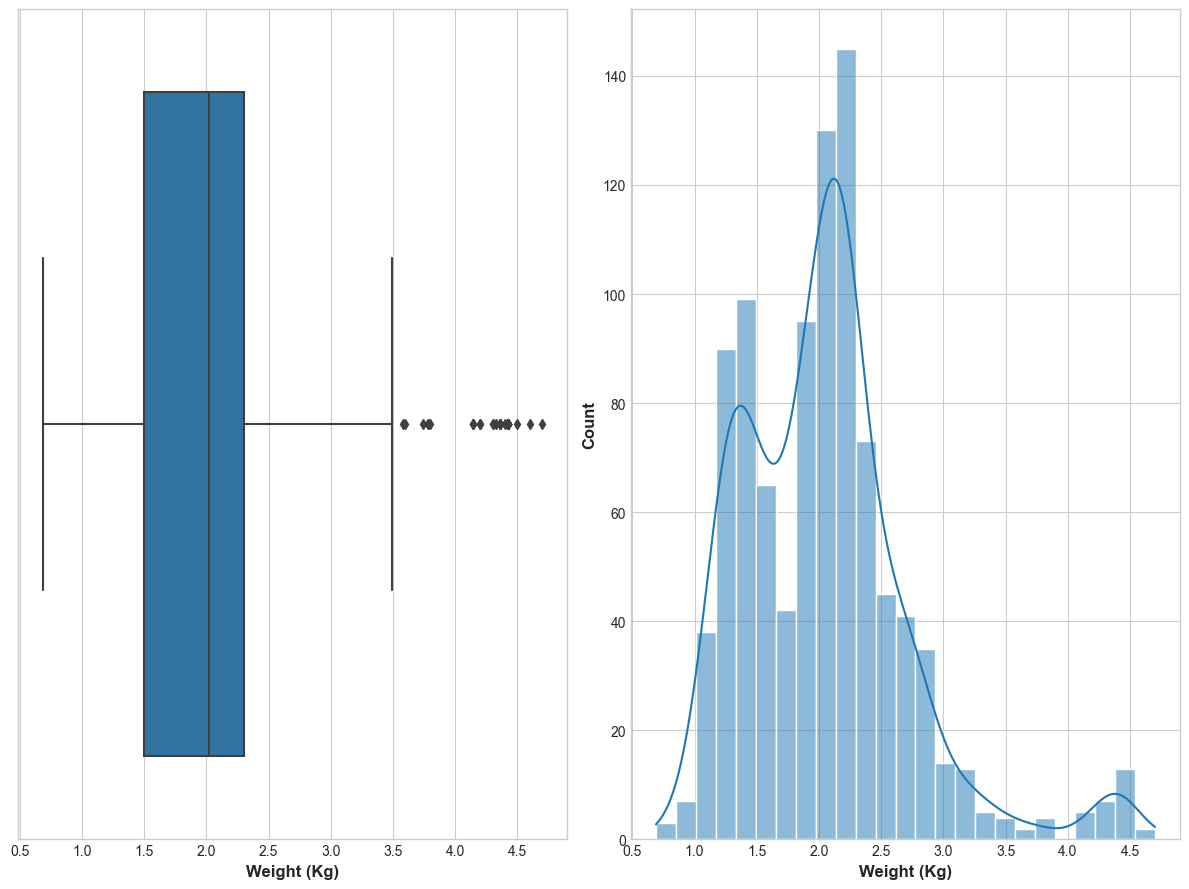

In [24]:
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(12, 9))

sns.boxplot(data=laptop, x = 'weigth(kg)', ax = ax_box)
ax_box.set_xlabel('Weight (Kg)')

sns.histplot(data=laptop, x = 'weigth(kg)', ax = ax_hist, kde=True)
ax_hist.set_xlabel('Weight (Kg)')

plt.tight_layout()
plt.show()

**Menggunakan Plotly**

In [25]:
fig = px.histogram(laptop, x = 'weigth(kg)', title='Distribusi Laptop Berdasarkan Berat (KG)', marginal='box', color_discrete_sequence=['#FFA500'])
fig.show()

##### Kolom Resolusi Layar (Pixel)

**Menggunakan Matplotlib**

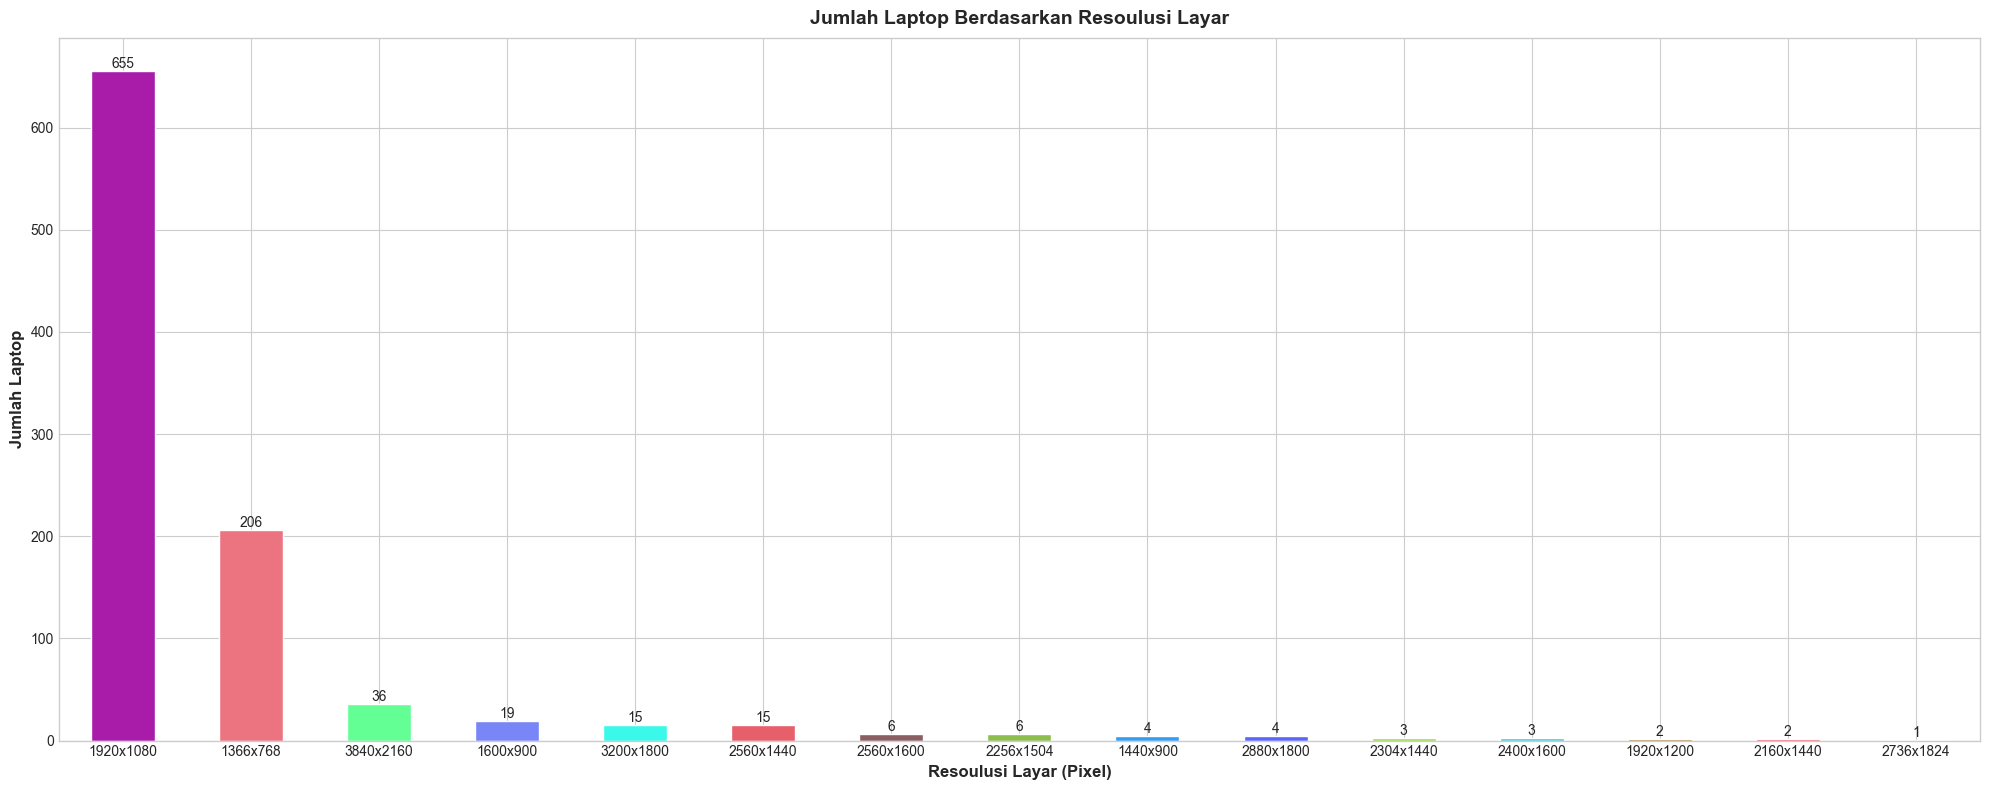

In [26]:
resolusi = laptop['resolution'].value_counts()

colors = ['#' + ''.join(random.choices('123456789ABCDEF', k = 6)) for _ in range(len(resolusi))]

plt.figure(figsize=(20,  8))
ax = resolusi.plot(kind = 'bar', color = colors)
plt.title("Jumlah Laptop Berdasarkan Resoulusi Layar")
plt.xlabel('Resoulusi Layar (Pixel)')
plt.ylabel('Jumlah Laptop')
plt.xticks(rotation = 0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'bottom')

plt.show()

**Menggunakan Pyplot**

In [27]:
grouped_resolusi = laptop.groupby(['resolution']).size().reset_index(name = 'counts')
grouped_resolusi = grouped_resolusi.sort_values(by='counts', ascending=False)

fig = px.bar(grouped_resolusi, x = 'resolution', y = 'counts', color = 'resolution', labels={'counts': 'Jumlah Laptop'}, title= 'Jumlah Laptop Berdasarkan Resolusi (pixel)')

fig.update_layout(width = 2400, height = 1000)

fig.show()

##### Kolom Screentype

**Menggunakan Matplotlib**

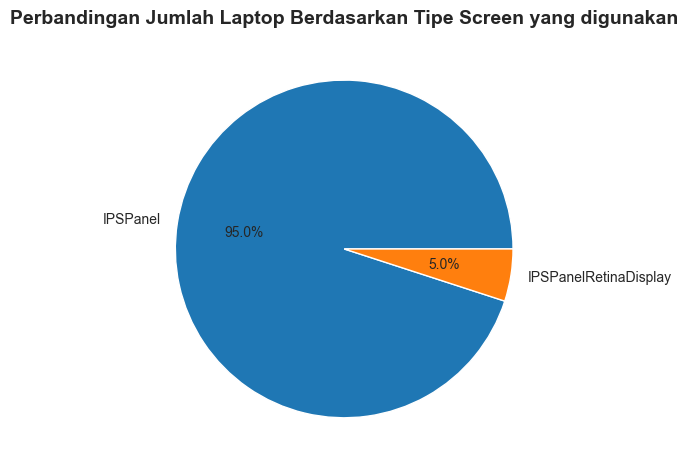

In [28]:
grouped_screentype = laptop.groupby('screentype').size().reset_index(name = 'counts')

plt.pie(grouped_screentype['counts'], labels=grouped_screentype['screentype'], autopct='%1.1f%%')
plt.title('Perbandingan Jumlah Laptop Berdasarkan Tipe Screen yang digunakan')
plt.show()

**Menggunakan Pyplot**

In [29]:
fig = px.pie(grouped_screentype, values = 'counts', names = 'screentype', labels={'counts': 'Jumlah Laptop'}, title='Jumlah Perbandingan Persentase Laptop Berdasarkan Tipe Screen')

fig.show()

##### Kolom Touchscreen

In [30]:
laptop['touchscreen'] = laptop['touchscreen'].astype(str)

laptop['touchscreen'] = laptop['touchscreen'].str.replace('0.0', "No Touchscreen")
laptop['touchscreen'] = laptop['touchscreen'].str.replace('1.0', 'Touchscreen')

laptop['touchscreen'].unique()

array(['No Touchscreen', 'Touchscreen'], dtype=object)

**Menggunakan Matplotlib**

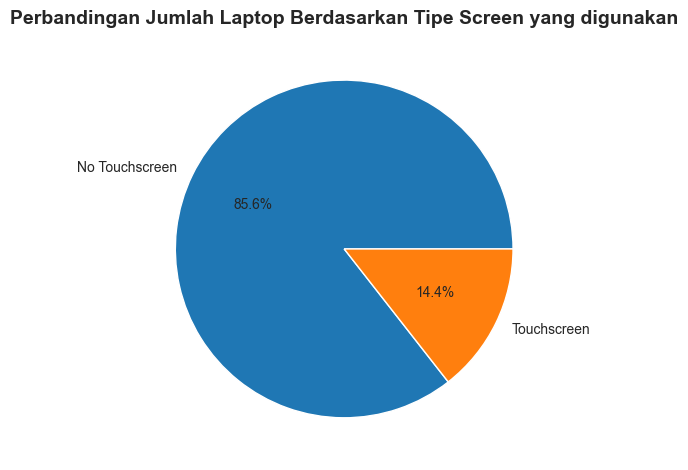

In [31]:
touchscreen = laptop.groupby('touchscreen').size().reset_index(name="counts")

plt.pie(touchscreen['counts'], labels=touchscreen['touchscreen'], autopct='%1.1f%%')
plt.title('Perbandingan Jumlah Laptop Berdasarkan Tipe Screen yang digunakan')
plt.show()

**Menggunakan Plotly**

In [32]:
fig = px.pie(touchscreen, values = 'counts', names='touchscreen', labels={'counts': 'Jumlah Laptop'}, title="Perbandingan Laptop dengan Toouchscrren dan Tanpa Touchscreen")

fig.show()

##### Kolom CPU

*TOP 10 CPU*

In [33]:
cpu_list = laptop['cpu_name'].value_counts()[:10].index.tolist()

data = laptop.copy()
data = data[data['cpu_name'].isin(cpu_list)]

# Group data by company column
grouped = data.groupby('cpu_name').size().reset_index(name='counts')

# Sort data in descending order based on counts
grouped = grouped.sort_values(by='counts', ascending=False)

# Create a bar chart using the plotly.express function
fig = px.bar(grouped, x='cpu_name', y='counts', color='cpu_name', labels={'counts':'Jumlah Laptop'}, title="TOP 10 Common CPUs")
fig.show()

*CPU Speed(GHz)*

**Menggunakan Plotly**

In [34]:
cpu_speed = laptop.groupby('cpu_speed(GHz)').size().reset_index(name='counts')
cpu_speed['cpu_speed(GHz)'] = cpu_speed['cpu_speed(GHz)'].astype(str)

fig = px.bar(cpu_speed, x = 'cpu_speed(GHz)', y = 'counts', color = 'cpu_speed(GHz)', labels = {'counts': 'Jumlah Laptop'}, title='Jumlah Laptop Berdasaarkan Kecepatan CPU (GHz)', barmode = 'stack')

fig.update_layout(
    width = 1200,
    height = 500,
    xaxis = dict(
        tickmode = 'array',
        tickvals = cpu_speed['cpu_speed(GHz)'].unique(),
        ticktext = cpu_speed['cpu_speed(GHz)'].unique()
    )
)

fig.show()

In [35]:
fig = px.histogram (laptop, x = 'cpu_speed(GHz)', title = 'Distribusi Laptop Berdasarkan Kecepatan CPU (GHz)', marginal = 'box', color_discrete_sequence = ['#FF1050'])
fig.show()

*CPU Brand*

In [36]:
cpu_brand = laptop.groupby('cpu_brand').size().reset_index(name='counts')

fig = px.pie(cpu_brand, values = "counts", names = 'cpu_brand', color = 'cpu_brand', labels = {'counts': 'Jumlah Laptop'}, title = 'Perbandingan Jumlah Laptop Berdasarkan Brand CPU', color_discrete_sequence=px.colors.qualitative.G10)

fig.show()

##### Storage 1 (Utama)

*Kapasitas Storage*

**Menggunakan Plotly**

In [37]:
grouped_storage_1 = laptop.groupby('storage_1(GB)').size().reset_index(name='counts')
grouped_storage_1['storage_1(GB)'] = grouped_storage_1['storage_1(GB)'].astype(str)

fig = px.bar(grouped_storage_1, x = 'storage_1(GB)', y = 'counts', color = 'storage_1(GB)', labels={'counts': 'Jumlah Laptop'}, title="Jumlah Laptop Berdasarkan Storage Utama")

fig.update_layout(
    width = 2400,
    height = 1000
)

fig.show()

In [38]:
fig = px.histogram(grouped_storage_1, x = 'storage_1(GB)', y = 'counts', title = "First Storage Distributin (GB)", marginal = 'box')
fig.show()

*Tipe Storage Utama*

In [39]:
laptop['storage_1_type'].unique()

array(['SSD', 'Flash Storage', 'HDD', 'SSD  ', 'Hybrid',
       'Flash Storage  ', 'HDD  '], dtype=object)

In [40]:
laptop['storage_1_type'] = laptop['storage_1_type'].replace({'SSD  ': 'SSD', 'HDD  ': 'HDD', 'Flash Storage  ': 'Flash Storage'})

In [41]:
grouped_storage_1_type = laptop.groupby('storage_1_type').size().reset_index(name='counts')

fig = px.pie(grouped_storage_1_type, names = 'storage_1_type', values = 'counts', labels={'counts': 'Jumlah Laptop'}, title='Jumlah Laptop Berdasarkan Tipe Storage yang digunakan')

fig.show()

##### Storage 2 (Tambahan)

*Kapasistas Storage Tambahan*

In [42]:
grouped_storage_2 = laptop.groupby('storage_2(GB)').size().reset_index(name='counts')
grouped_storage_2['storage_2(GB)'] = grouped_storage_2['storage_2(GB)'].astype(str)

fig = px.bar(grouped_storage_2, x = 'storage_2(GB)', y = 'counts', color = 'storage_2(GB)', labels={'counts': 'Jumlah Laptop'}, title="Jumlah Laptop Berdasarkan Storage Tambahan")

fig.update_layout(
    width = 2400,
    height = 1000
)

fig.show()

*Persentase Perbandingan Laptop dengan Storage Tambahan dan tampa storage tambahan*

In [43]:
storage_counts = laptop['storage_2(GB)'].value_counts()

labels = ['Tidak menggunakan Storage 2', 'Menggunakan Storage 2']
values = [storage_counts.get(0.0, 0), storage_counts.sum() - storage_counts.get(0.0, 0)]

fig = px.pie(values=values, names=labels, title='Perbandingan Jumlah Laptop Penggunaan Storage 2')

fig.show()

*Persentase Perbandingan Tipe Storage Tambahan yang digunakan*

In [44]:
grouped_storage_2_type = laptop.groupby('storage_2_type').size().reset_index(name='counts')

fig = px.pie(grouped_storage_2_type, names = 'storage_2_type', values = 'counts', labels={'counts': 'Jumlah Laptop'}, title='Jumlah Laptop Berdasarkan Tipe Storage 2 yang digunakan')

fig.show()

##### Korelasi Antara RAM(GB) dan Harga

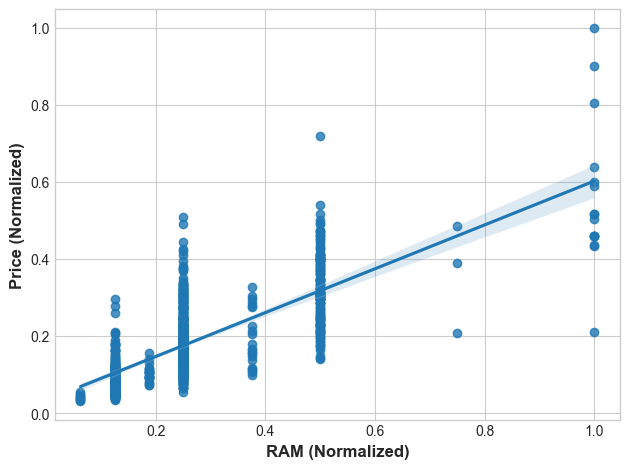

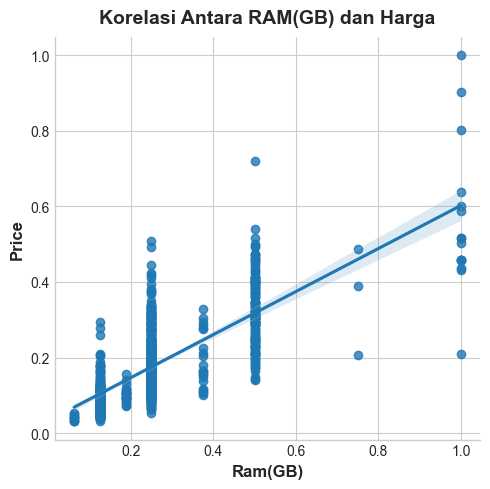

In [45]:
price_normalized = laptop['price'] / laptop['price'].max()
ram_normalized = laptop['ram(GB)'] / laptop['ram(GB)'].max()

data = pd.DataFrame({'RAM (Normalized)': ram_normalized, 'Price (Normalized)': price_normalized})

sns.regplot(data = data, x='RAM (Normalized)', y='Price (Normalized)')
sns.lmplot(data = data, x='RAM (Normalized)', y='Price (Normalized)')

plt.title("Korelasi Antara RAM(GB) dan Harga")
plt.xlabel('Ram(GB)')
plt.ylabel('Price')
plt.show()

In [46]:
laptop['price_normalized'] = laptop['price'] / laptop['price'].max()

In [47]:
price_normalized = laptop['price'] / laptop['price'].max()
ram_normalized = laptop['ram(GB)'] / laptop['ram(GB)'].max()

fig = px.scatter(data_frame=data, x='RAM (Normalized)', y='Price (Normalized)', trendline='ols')

fig.update_layout(title='Scatter Plot with Trendline: Korelasi RAM(GB) dan Price',
                  xaxis_title='RAM (Normalized)',
                  yaxis_title='Price (Normalized)')
fig.show()

##### Korelasi Antara CPU Speed(GHz) dan Harga

In [48]:
fig = px.scatter(data_frame=laptop, x='cpu_speed(GHz)', y='price_normalized', trendline='ols')

fig.update_layout(title='Scatter Plot with Trendline: Korelasi CPU Speed (GHz) dan Price',
                  xaxis_title='CPU Speed (GHz)',
                  yaxis_title='Price (Normalized)')
fig.show()

##### Korelasi Antara Ukuran Layar(inches) dan Harga

In [49]:
fig = px.scatter(data_frame=laptop, x='screen(pixel)', y='price_normalized', trendline='ols')

fig.update_layout(title='Scatter Plot with Trendline: Korelasi Screen (Pixel) dan Price',
                  xaxis_title='Screen (pixel)',
                  yaxis_title='Price (Normalized)')
fig.show()

##### Korelasi Antara Ukuran weight(Kg) dan Harga

In [50]:
fig = px.scatter(data_frame=laptop, x='weigth(kg)', y='price_normalized', trendline='ols')

fig.update_layout(title='Scatter Plot with Trendline: Korelasi weigth (kg) dan Price',
                  xaxis_title='weigth (kg)',
                  yaxis_title='Price (Normalized)')
fig.show()

##### Korelasi Antara Ukuran Ukuran Layar dan Berat Laptop

In [51]:
fig = px.scatter(data_frame = laptop, x = 'screen(pixel)', y = 'weigth(kg)', trendline = 'ols')

fig.update_layout(title = 'Scatter Plot with Trendline: Korelasi Antara Berat dengan Ukuran Layar',
                  xaxis_title = 'Screen Laptop (inches)',
                  yaxis_title = 'Berat Laptop (Kg)')

fig.show()

##### Perbandingan kategori produk dengan jumlah masing-masing kategori laptop

In [52]:
grouped_company_category = laptop.groupby(['company', 'category']).size().reset_index(name='counts')

fig = px.bar(grouped_company_category, x='company', y='counts', color='category', labels={'counts':'Jumlah Laptop'}, title="Jumlah Laptop berdasarkan Perusahaan dan Kategori", barmode='stack')
fig.update_layout(width=1600, height=1000)
fig.show()

##### Distribusi Harga Laptop

In [53]:
fig = px.histogram(laptop, x = 'price', title = "Price Distribution", marginal = 'rug')

fig.show()

##### Rata-rata Berat Laptop berdasarkan Kategori Produk

In [54]:
fig = px.box(laptop, x='category', y='weigth(kg)', color = "category", title="Rata-rata Berat Laptop berdasarkan Kategori Produk")

fig.show()

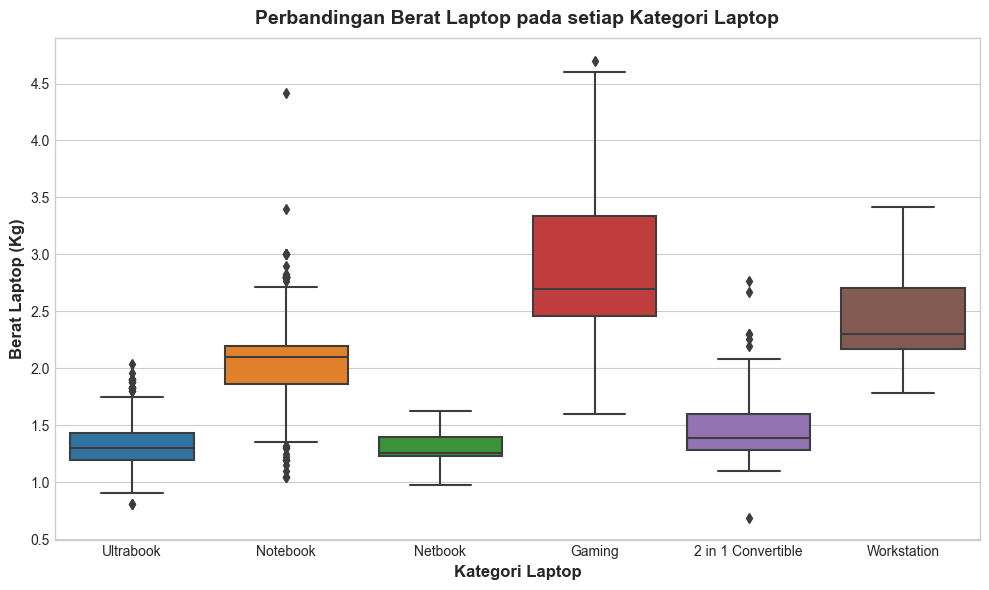

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=laptop, x='category', y='weigth(kg)')
plt.title('Perbandingan Berat Laptop pada setiap Kategori Laptop')
plt.xlabel('Kategori Laptop')
plt.ylabel('Berat Laptop (Kg)')

plt.show()

##### Perbandingan besar RAM(GB) berdasarkan Kategori Laptop

In [56]:
grouped_ram_category = laptop.groupby(['ram(GB)', 'category']).size().reset_index(name='counts')
grouped_ram_category['ram(GB)'] = grouped_ram_category['ram(GB)'].astype(str)

fig = px.bar(grouped_ram_category, x='ram(GB)', y='counts', color='category', labels={'counts':'Jumlah Laptop'}, title="Jumlah Laptop berdasarkan RAM (GB) dan Kategori", barmode='stack')

fig.update_layout(
    width=2400,
    height=1000,
    xaxis=dict(
        tickmode='array',
        tickvals=grouped_ram_category['ram(GB)'].unique(),
        ticktext=grouped_ram_category['ram(GB)'].unique()
    )
)

fig.show()

##### Boxplot Perbandingan Kecepatan CPU antar merek CPU

In [57]:
fig = px.box(laptop, x = 'cpu_brand', y = 'cpu_speed(GHz)', color = "cpu_brand", title = "Perbandingan Kecepatan CPU antar Brand")

fig.show()

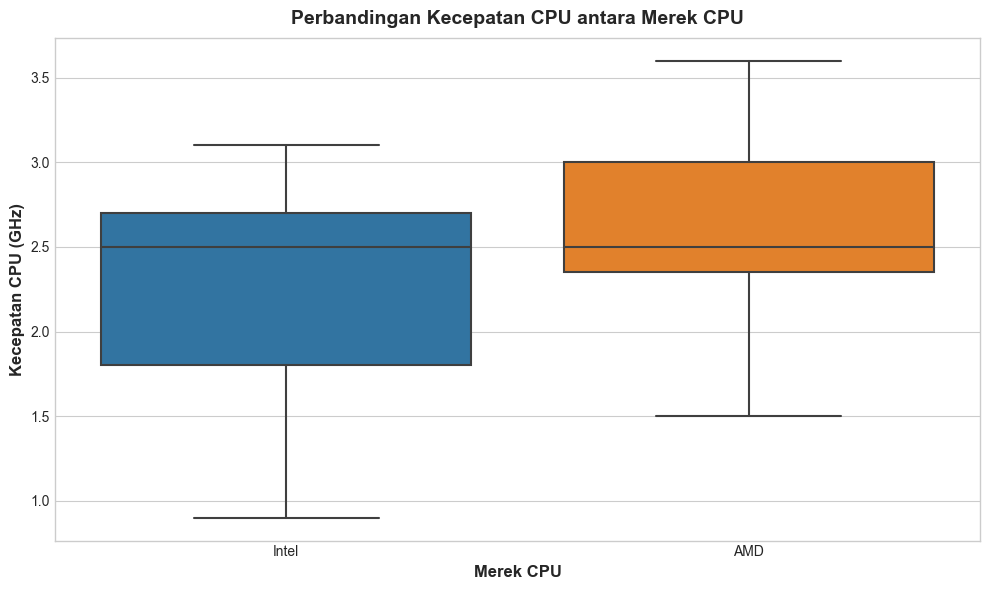

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=laptop, x='cpu_brand', y='cpu_speed(GHz)')
plt.title('Perbandingan Kecepatan CPU antara Merek CPU')
plt.xlabel('Merek CPU')
plt.ylabel('Kecepatan CPU (GHz)')

plt.show()

##### Perbandingan Kategori Produk dengan Harga Laptop (Normalized)

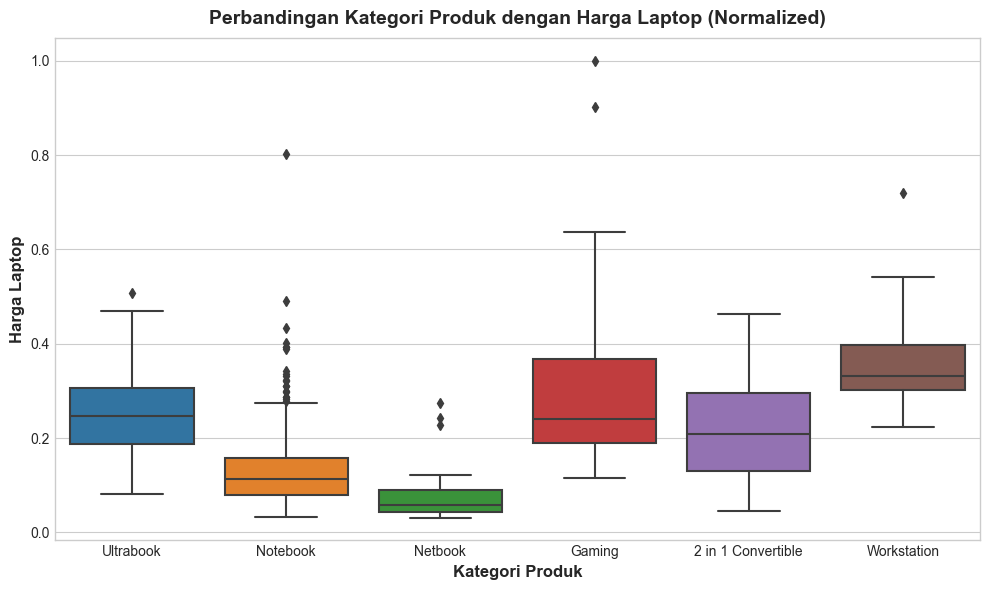

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=laptop, x='category', y='price_normalized')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Kategori Produk')
plt.ylabel('Harga Laptop')
plt.title('Perbandingan Kategori Produk dengan Harga Laptop (Normalized)')

plt.show()

##### Distribusi Laptop Berdasarkan Berat(Kg) dan besar RAM(GB)

In [60]:
grouped_ram_berat = laptop.groupby(['weigth(kg)', 'ram(GB)']).size().reset_index(name = 'counts')

fig = px.histogram(grouped_ram_berat, x='weigth(kg)', y = 'counts', color='ram(GB)', labels = {'counts': 'Jumlah Laptop'}, nbins=30, barmode='overlay')

fig.update_layout(
    title='Distribusi Berat Laptop Berdasarkan RAM',
    xaxis_title='Berat (kg)',
    yaxis_title='Jumlah Laptop',
)

fig.show()

<Figure size 1200x800 with 0 Axes>

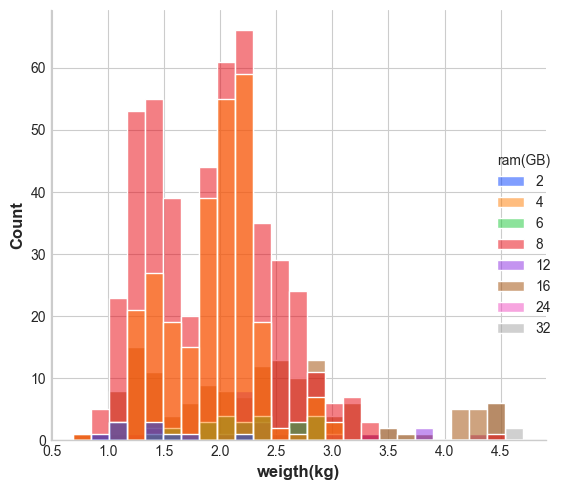

In [61]:
plt.figure(figsize=(12, 8))
sns.displot(data=laptop, x = 'weigth(kg)', hue = 'ram(GB)', palette='bright')

plt.show()

##### Perbandingan Jumlah Laptop Berdasarkan Company/Perusahaan dan Sistem Operasi yang digunakannya

In [62]:
grouped_company_os = laptop.groupby(['company', 'os']).size().reset_index(name = 'counts')

fig = px.bar(grouped_company_os, x = 'company', y = 'counts', color = 'os', labels = {'counst': 'Jumlah Laptop'}, title = 'Jumlah Laptop Berdasarkan Company dan Sistem Operasinya')
fig.update_layout(width = 1600, height = 1000)
fig.show()

##### Pemetaan Jumlah Laptop Berdasarkan Kategori Laptop dan OS

In [63]:
grouped_category_os = laptop.groupby(['category', 'os']).size().reset_index(name = 'counts')

fig = px.bar(grouped_category_os, x = 'category', y = 'counts', color = 'os', labels = {'counst': 'Jumlah Laptop'}, title = 'Jumlah Laptop Berdasarkan category dan Sistem Operasinya')
fig.update_layout(width = 1600, height = 1000)
fig.show()

##### Perbandingan Jumlah Laptop Berdasarkan Resolusi dan Kategori Produk

In [64]:
grouped_resolusi = laptop.groupby(['resolution', 'category']).size().reset_index(name = 'counts')

fig = px.bar(grouped_resolusi, x = 'resolution', y = 'counts', color = 'category', labels={'counts': 'Jumlah Laptop'}, title= 'Jumlah Laptop Berdasarkan Resolusi')

fig.update_layout(width = 2400, height = 1000)

fig.show()

##### Perbandingan Laptop dengan dan tanpa Touchscrren berdasarkan Company

In [65]:
grouped_touchscreen_company = laptop.groupby(['touchscreen', 'company']).size().reset_index(name='counts')

fig = px.bar(grouped_touchscreen_company, x = 'company', y = 'counts', color = 'touchscreen', labels={'counts': 'Jumlah Laptop'}, title='Perbandingan Laptop dengan dan tanpa Touchscrren berdasarkan Company', color_discrete_map={0: 'red', 1: 'blue'})

fig.update_layout(width = 2400, height = 1000)

fig.show()

##### Perbandingan Laptop dengan dan tanpa Touchscrren berdasarkan Kategori Laptop

In [66]:
grouped_touchscreen_category = laptop.groupby(['touchscreen', 'category']).size().reset_index(name='counts')

fig = px.bar(grouped_touchscreen_category, x = 'category', y = 'counts', color = 'touchscreen', labels={'counts': 'Jumlah Laptop'}, title='Perbandingan Laptop dengan dan tanpa Touchscrren berdasarkan category')

fig.update_layout(width = 2400, height = 1000)

fig.show()

##### Perbandingan Produk Laptop dengan Merek CPU yang digunakan

In [67]:
grouped_cpubrand_company = laptop.groupby(['cpu_brand', 'company']).size().reset_index(name = 'counts')

fig = px.bar(grouped_cpubrand_company, x = 'company', y = 'counts', color = 'cpu_brand', labels = {'cpu_brand': 'Jumlah Laptop'}, title = 'Kategori Laptop dan CPU yang digunakan', color_discrete_sequence=px.colors.qualitative.Dark24)

fig.update_layout(width = 2400, height = 1000)

fig.show()

##### Perbandingan Kategori Laptop dengan Merek CPU yang digunakan

In [68]:
grouped_cpubrand_category = laptop.groupby(['cpu_brand', 'category']).size().reset_index(name = 'counts')

fig = px.bar(grouped_cpubrand_category, x = 'category', y = 'counts', color = 'cpu_brand', labels = {'cpu_brand': 'Jumlah Laptop'}, title = 'Kategori Laptop dan CPU yang digunakan', color_discrete_sequence=["red", "blue",])

fig.update_layout(width = 2400, height = 1000)

fig.show()

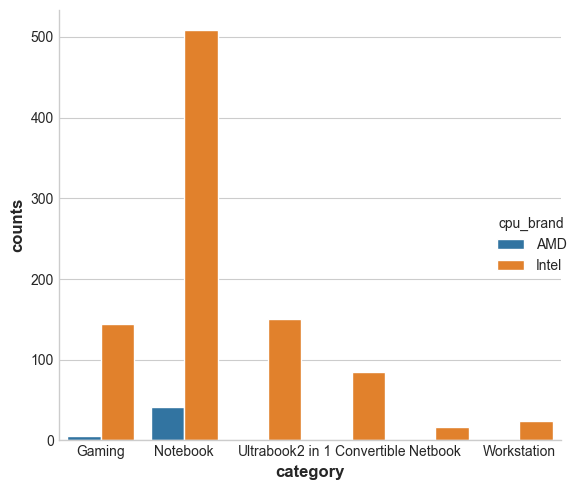

In [69]:
sns.catplot(data=grouped_cpubrand_category, x="category", y="counts", hue="cpu_brand", kind="bar")

##### Perbandinngan Jumlah Laptop Berdasarkan Kategori Laptop dan GPU yang digunakan

In [70]:
grouped_gpu_category = laptop.groupby(['gpu_name', 'category']).size().reset_index(name = 'counts')

fig = px.bar(grouped_gpu_category, x = 'category', y = 'counts', color = 'gpu_name', labels = {'cpu_brand': 'Jumlah Laptop'}, title = 'Kategori Laptop dan GPU yang digunakan', color_discrete_sequence=px.colors.qualitative.Dark24)

fig.update_layout(width = 2400, height = 1000)

fig.show()

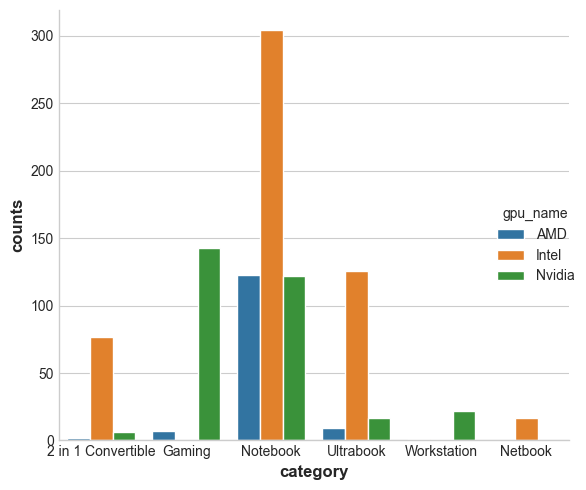

In [71]:
sns.catplot(data=grouped_gpu_category, x="category", y="counts", hue="gpu_name", kind="bar")

##### Perbandinngan Jumlah Laptop Berdasarkan Perusahan Laptop dan GPU yang digunakan

In [72]:
grouped_gpu_company = laptop.groupby(['gpu_name', 'company']).size().reset_index(name = 'counts')

fig = px.bar(grouped_gpu_company, x = 'company', y = 'counts', color = 'gpu_name', labels = {'cpu_brand': 'Jumlah Laptop'}, title = 'Produk Laptop dan GPU yang digunakan', color_discrete_sequence=px.colors.qualitative.Dark24)

fig.update_layout(width = 2400, height = 1000)

fig.show()

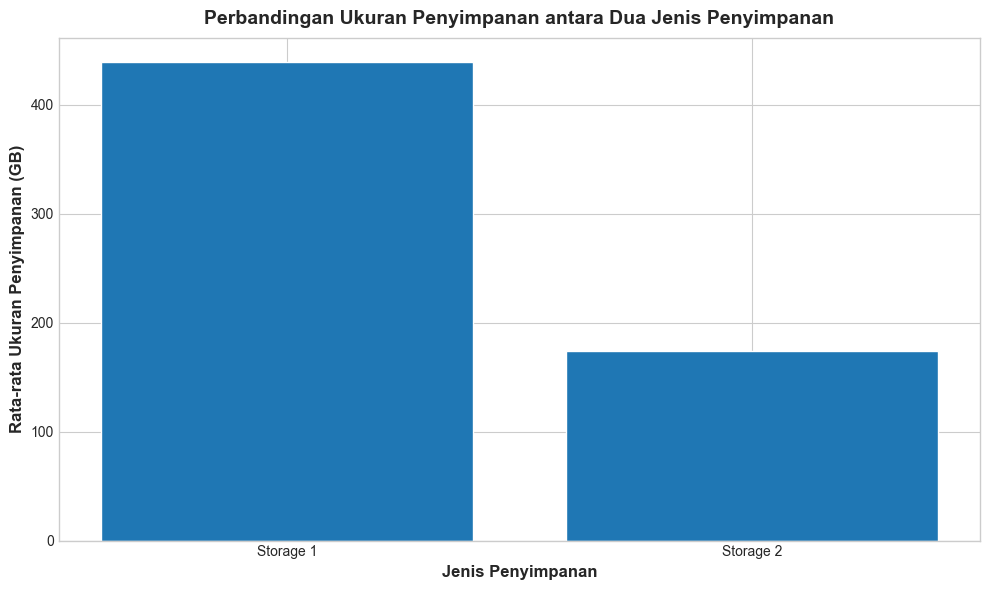

In [73]:
# Menghitung rata-rata ukuran penyimpanan untuk setiap jenis penyimpanan
storage1_mean = laptop['storage_1(GB)'].mean()
storage2_mean = laptop['storage_2(GB)'].mean()

# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.bar(['Storage 1', 'Storage 2'], [storage1_mean, storage2_mean])
plt.title('Perbandingan Ukuran Penyimpanan antara Dua Jenis Penyimpanan')
plt.xlabel('Jenis Penyimpanan')
plt.ylabel('Rata-rata Ukuran Penyimpanan (GB)')

plt.show()

##### Hubungan antara Kategori Laptop dengan RAM

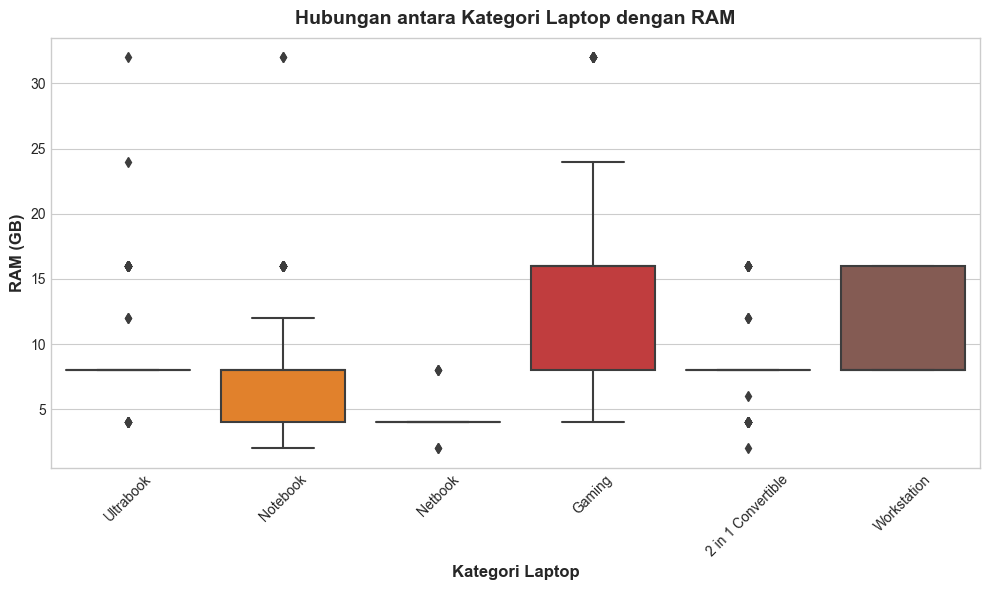

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=laptop, x='category', y='ram(GB)')
plt.title('Hubungan antara Kategori Laptop dengan RAM')
plt.xlabel('Kategori Laptop')
plt.ylabel('RAM (GB)')
plt.xticks(rotation=45)

plt.show()

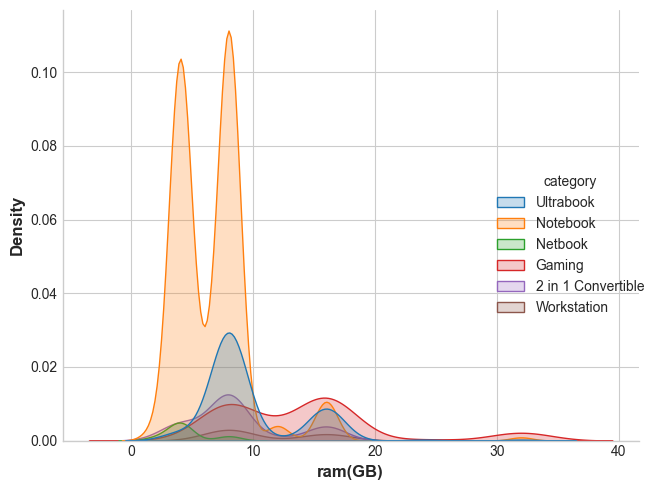

In [75]:
sns.displot(laptop, x = "ram(GB)", kind="kde", hue = "category", fill = True)

##### Distribusi Harga Laptop Berdasarkan CPU dan GPU yang digunakan

In [76]:
fig = px.box(laptop, x = "cpu_brand", y = "price", color = "gpu_name")
fig.show()

# BATAS SINI

In [77]:
fig = px.imshow(laptop.corr(), text_auto=True, aspect="auto", title="Correlation Matrix")
fig.show()

In [104]:
laptop_clean = laptop.copy()

In [105]:
laptop_clean['price'] = laptop_clean['price_normalized']
laptop_clean  = laptop_clean.drop(columns='price_normalized')
laptop_clean.columns

Index(['company', 'product', 'category', 'screen(pixel)', 'ram(GB)', 'gpu',
       'os', 'os_version', 'weigth(kg)', 'price', 'resolution', 'screentype',
       'touchscreen', 'cpu_name', 'cpu_speed(GHz)', 'cpu_brand',
       'storage_1(GB)', 'storage_2(GB)', 'storage_1_type', 'storage_2_type',
       'gpu_name'],
      dtype='object')

In [106]:
laptop_clean.describe()

,screen(pixel),ram(GB),weigth(kg),price,cpu_speed(GHz),storage_1(GB),storage_2(GB)
count,977.00000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000
mean,15.05261,8.528147,2.039128,0.184742,2.284033,439.373593,173.776868
std,1.41895,4.997487,0.666009,0.116285,0.523576,364.729684,413.903988
min,10.10000,2.000000,0.690000,0.031464,0.900000,1.000000,0.000000
25%,14.00000,4.000000,1.500000,0.098213,1.800000,256.000000,0.000000
50%,15.60000,8.000000,2.020000,0.157239,2.500000,256.000000,0.000000
75%,15.60000,8.000000,2.300000,0.241843,2.700000,512.000000,0.000000
max,18.40000,32.000000,4.700000,1.000000,3.600000,2000.000000,2000.000000


In [107]:
column = ['company', 'product', 'category', 'gpu', 'os', 'os_version', 'resolution', 'screentype', 'touchscreen', 'cpu_name', 'cpu_brand', 'storage_1_type', 'storage_2_type', 'gpu_name']

In [108]:
print("Dataframe encoded by ONE HOT ENCODING Dimension: ", pd.get_dummies(laptop_clean, columns=column, drop_first=True).shape)

Dataframe encoded by ONE HOT ENCODING Dimension:  (977, 735)


In [109]:
en = LabelEncoder()
for cols in column:
    laptop_clean[cols] = en.fit_transform(laptop_clean[cols])
print('Dataframe encoded by Label encoding dimension : ', laptop_clean.shape)

Dataframe encoded by Label encoding dimension :  (977, 21)


In [110]:
laptop_clean.head()

,company,product,category,screen(pixel),ram(GB),gpu,os,os_version,weigth(kg),price,...,screentype,touchscreen,cpu_name,cpu_speed(GHz),cpu_brand,storage_1(GB),storage_2(GB),storage_1_type,storage_2_type,gpu_name
0,1,236,4,13.3,8,51,6,8,1.37,0.219657,...,1,0,46,2.3,1,128.0,0.0,3,2,1
1,1,237,4,13.3,8,45,6,8,1.34,0.147391,...,2,0,46,1.8,1,128.0,0.0,0,2,1
2,7,38,3,15.6,8,47,4,4,1.86,0.094278,...,2,0,52,2.5,1,256.0,0.0,3,2,1
3,1,236,4,15.4,16,7,6,8,1.83,0.416044,...,1,0,60,2.7,1,512.0,0.0,3,2,0
4,1,236,4,13.3,8,52,6,8,1.37,0.295721,...,1,0,46,3.1,1,256.0,0.0,3,2,1


In [111]:
X = laptop_clean.drop('price', axis = 1).values

In [112]:
y = laptop_clean['price'].values

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [114]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=seed)

In [115]:
rf = RandomForestRegressor(n_estimators=100, max_depth=100, max_features=15)

In [116]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features=15)

In [117]:
y_pred_rf = rf.predict(X_test)

In [118]:
mse_rf = mean_squared_error(np.exp(y_test), np.exp(y_pred_rf))
print("RMSE using RF: {} $".format(np.round(np.sqrt(mse_rf)), 4))

RMSE using RF: 0.0 $


In [120]:
print("R2 using Random Forest {:.2f}%".format(np.round(r2_score(y_test, y_pred_rf), 4) * 100))

R2 using Random Forest 79.44%


In [131]:
feature_name_list = laptop_clean.drop('price', axis=1).columns

In [132]:
rf.feature_names = feature_name_list

In [133]:
print(len(rf.feature_names))
print(len(rf.feature_importances_))

20
20


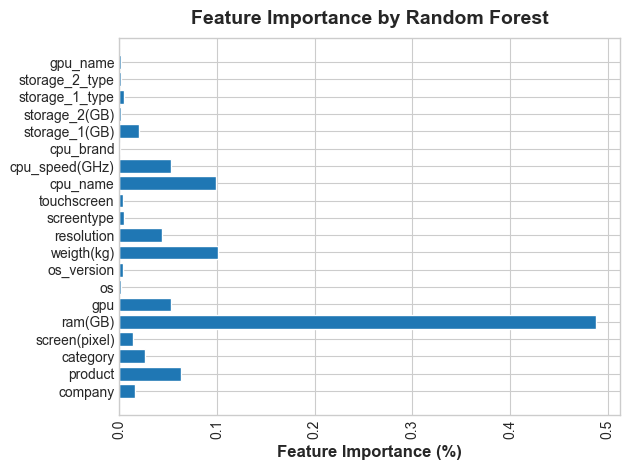

In [134]:
plt.barh(rf.feature_names, rf.feature_importances_)
plt.xticks(rotation = 90)
plt.title('Feature Importance by Random Forest')
plt.xlabel("Feature Importance (%)")
plt.show()

In [135]:
def objective(trial, X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val):
    dtrain = xgboost.DMatrix(X_train, label=y_train)
    dvalid = xgboost.DMatrix(X_val, label=y_val)

    param = {
        'objective' : 'reg:squarederror',
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 5.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 5.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.001,0.01,0.05,0.1,0.2,0.25,0.3]),
        'n_estimators': trial.suggest_categorical('n_estimators', [300,400,500,1000,1500,2000,2500,3000]),
        'max_depth': trial.suggest_categorical('max_depth', [3,4,5,6,7]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 100),
    }


    model = xgboost.XGBRegressor(**param)    
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)   
    preds = model.predict(X_val)
    rmse = mean_squared_error(y_val, preds, squared=False)

    return rmse

In [136]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

[I 2023-05-24 23:39:34,338] A new study created in memory with name: no-name-d07084c4-f392-410e-8501-9b3d98cbadd7
[I 2023-05-24 23:39:34,748] Trial 0 finished with value: 0.0640663487645508 and parameters: {'lambda': 0.006400250583754113, 'alpha': 0.001989407857133292, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.3, 'n_estimators': 1000, 'max_depth': 3, 'min_child_weight': 91}. Best is trial 0 with value: 0.0640663487645508.
[I 2023-05-24 23:39:34,956] Trial 1 finished with value: 0.04515353964281306 and parameters: {'lambda': 0.011690945777453063, 'alpha': 0.0013185285058207171, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.3, 'n_estimators': 2000, 'max_depth': 6, 'min_child_weight': 28}. Best is trial 1 with value: 0.04515353964281306.
[I 2023-05-24 23:39:35,149] Trial 2 finished with value: 0.07189012120448933 and parameters: {'lambda': 0.004294153553106989, 'alpha': 0.0019663421478650156, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0

Number of finished trials:  100
Best trial:
  Value: 0.03630221899017417
  Params: 
    lambda: 0.0015157044361381099
    alpha: 0.02311722897935679
    colsample_bytree: 0.5
    subsample: 0.8
    learning_rate: 0.3
    n_estimators: 2000
    max_depth: 4
    min_child_weight: 1


In [137]:
params

[0.0015157044361381099, 0.02311722897935679, 0.5, 0.8, 0.3, 2000, 4, 1]

In [138]:
lambda_opt = params[0]
alpha_opt = params[1]
colsample_bytree_opt = params[2]
subsample_opt = params[3]
learning_rate_opt = params[4]
n_estimators_opt = params[5]
max_depth_opt = params[6]
min_child_weight_opt = params[7]

In [139]:
xgb = XGBRegressor(reg_lambda = lambda_opt,
                   alpha = alpha_opt,
                   colsample_bytree = colsample_bytree_opt,
                   subsample_opt = subsample_opt,
                   learning_rate = learning_rate_opt,
                   n_estimators = n_estimators_opt,
                   max_depth = max_depth_opt,
                   min_child_weight = min_child_weight_opt)

In [140]:
xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=0)

[23:41:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "subsample_opt" } are not used.



XGBRegressor(alpha=0.02311722897935679, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=2000, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [141]:
y_pred_xgb = xgb.predict(X_test)

In [142]:
mse_xgb = mean_squared_error(np.exp(y_test), np.exp(y_pred_xgb))

In [143]:
print("RMSE with XGBoost: {:.2f} $".format(np.round(np.sqrt(mse_xgb), 2)))

RMSE with XGBoost: 0.08 $


In [144]:
print("R2 with XGBoost: {:.2f}%".format(np.round(r2_score(y_test, y_pred_xgb), 4) * 100))

R2 with XGBoost: 85.72%


In [145]:
xgb.features_names = feature_name_list

In [146]:
x = np.exp(y_test)
y = np.exp(y_pred_rf)
z = [x, y]

fig = px.scatter(z, x = x, y = y, trendline="ols", title = "RF vs XGBoost Price Regression")

fig.show()

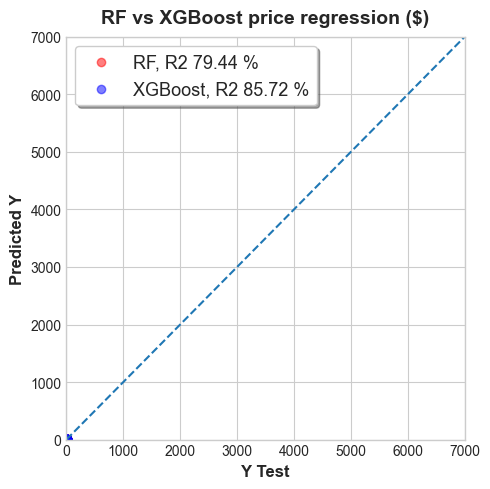

In [147]:
plt.figure(figsize = (5,5))
plt.scatter(np.exp(y_test), np.exp(y_pred_rf), alpha=0.5, color='red',label='RF, R2 {:.2f} %'.format(r2_score(y_test, y_pred_rf)*100))
plt.scatter(np.exp(y_test), np.exp(y_pred_xgb), alpha=0.5, color='blue',label='XGBoost, R2 {:.2f} %'.format(r2_score(y_test, y_pred_xgb)*100))
plt.plot([0, 7000], [0, 7000], linestyle='--')
plt.axis([0, 7000, 0, 7000])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('RF vs XGBoost price regression ($)')
plt.legend(loc='upper left', ncol=1, fontsize=13, fancybox=True, shadow=True, frameon=True)
plt.show()

In [148]:
print("RMSE using RF: {:.2f} $ ".format(np.sqrt(mse_rf)))
print("RMSE with XGBoost : {:.2f} $".format(np.sqrt(mse_xgb)))

RMSE using RF: 0.09 $ 
RMSE with XGBoost : 0.08 $


In [149]:
fig = px.histogram(x = x, y = y, color = x)
fig.show()

ConversionError: Failed to convert value(s) to axis units: None

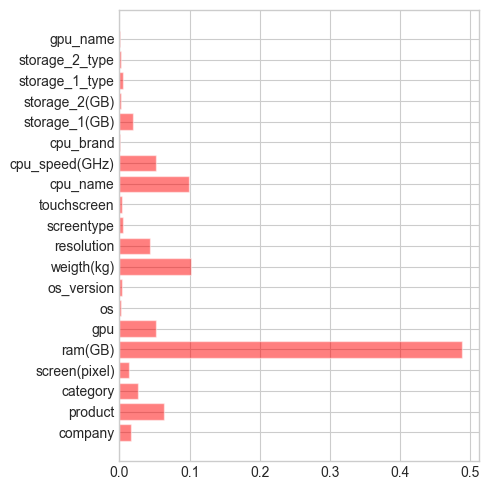

In [151]:
plt.figure(figsize=(5, 5))
plt.barh(rf.feature_names, rf.feature_importances_, alpha=0.5, label='RF', color='red')
plt.barh(xgb.get_booster().feature_names, xgb.feature_importances_, alpha=0.5, label='XGBoost', color='blue')
plt.legend(loc='center right', ncol=1, fontsize=14, fancybox=True, shadow=True, frameon=True)
plt.title('Feature Importance for Price Prediction\nby XGBoost and Random Forest')
plt.xlabel('Feature Importance (%)')
plt.show()

In [119]:
laptop.columns

Index(['company', 'product', 'category', 'screen(pixel)', 'ram(GB)', 'gpu',
       'os', 'os_version', 'weigth(kg)', 'price', 'resolution', 'screentype',
       'touchscreen', 'cpu_name', 'cpu_speed(GHz)', 'cpu_brand',
       'storage_1(GB)', 'storage_2(GB)', 'storage_1_type', 'storage_2_type',
       'gpu_name', 'price_normalized'],
      dtype='object')